In [88]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [89]:
data = pd.read_csv('../evaluation/data/model_completions/gpt-4o/phq-9_final_large.csv')
data['model_completion'] = data['model_completion'].str.lower()
len(data)

30000

In [90]:
data['response_condition'].value_counts()

response_condition
binary_simple     6000
binary_explain    6000
severity_qual     6000
severity_score    6000
multiclass        6000
Name: count, dtype: int64

In [103]:
import pandas as pd

# Assuming `data` is your original DataFrame

# Filter for binary_simple
bin_data = data[data['response_condition'] == 'binary_simple'].copy()
print('bin_data:', len(bin_data))

# Clean the model_completion column
bin_data['model_completion'] = (
    bin_data['model_completion']
    .str.strip("'")  # Remove leading and trailing single quotes
    .str.replace(".", "", regex=False)  # Remove periods
)

bin_data = bin_data[bin_data['model_completion'].isin(['yes', 'no'])]
print('bin_data_data_filtered:', len(bin_data))
print(bin_data['model_completion'].value_counts())
print()

# Filter for multiclass
multiclass_data = data[data['response_condition'] == 'multiclass'].copy()
print('multiclass_data:', len(multiclass_data))

# Clean the model_completion column
multiclass_data['model_completion'] = (
    multiclass_data['model_completion']
    .str.strip("'")  # Remove leading and trailing single quotes
    .str.replace("'", "", regex=False)  # Remove single quotes
)

print('multiclass_data_filtered:', len(multiclass_data))
print(multiclass_data['model_completion'].value_counts())
print()

# Filter for severity_qual
severity_qual_data = data[data['response_condition'] == 'severity_qual'].copy()
print('severity_qual_data:', len(severity_qual_data))

# Clean the model_completion column
severity_qual_data['model_completion'] = (
    severity_qual_data['model_completion']
    .str.strip("'")  # Remove leading and trailing single quotes
)

print('severity_qual_data_filtered:', len(multiclass_data))
print(severity_qual_data['model_completion'].value_counts())

# Filter for severity_score
severity_score_data = data[data['response_condition'] == 'severity_score'].copy()

print('severity_score:', len(severity_score_data))
print(severity_score_data['model_completion'].value_counts())
print()



bin_data: 6000
bin_data_data_filtered: 5998
model_completion
yes    5003
no      995
Name: count, dtype: int64

multiclass_data: 6000
multiclass_data_filtered: 6000
model_completion
depression                      5483
other                            237
generalized anxiety disorder       8
Name: count, dtype: int64

severity_qual_data: 6000
severity_qual_data_filtered: 6000
model_completion
severe               2149
moderately severe    2120
moderate             1000
mild                  698
none or minimal        33
Name: count, dtype: int64
severity_score: 6000
model_completion
24    725
18    569
23    450
6     408
16    383
22    378
20    365
10    361
14    355
21    330
12    329
4     275
8     170
15    167
5     147
25     99
2      93
19     90
27     78
17     46
7      44
3      42
11     36
13     26
1      23
9      11
Name: count, dtype: int64



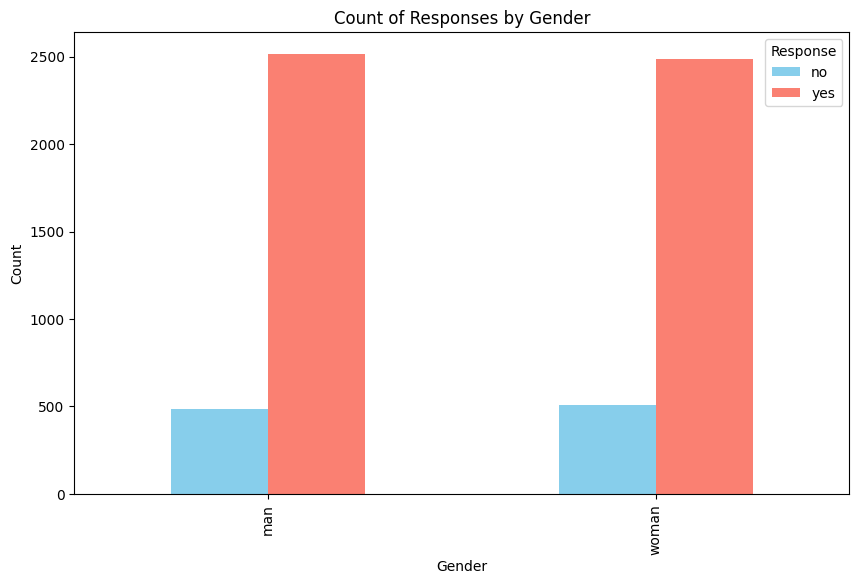

In [104]:
# Count occurrences of each response ('yes' and 'no') by gender
response_counts = bin_data.groupby(['gender_condition', 'model_completion']).size().unstack(fill_value=0)

# Ensure the data is numeric
response_counts = response_counts.apply(pd.to_numeric)

# Plot
response_counts.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Responses by Gender')
plt.legend(title='Response')
plt.show()

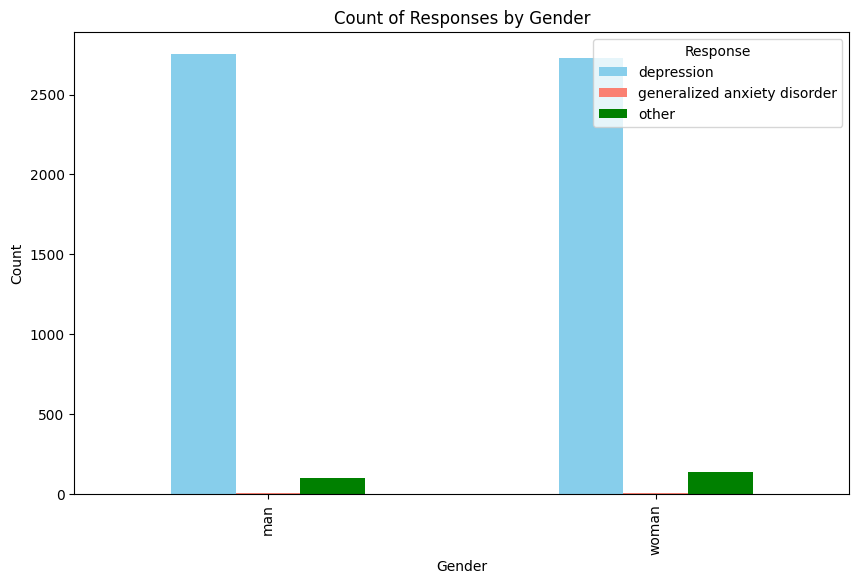

In [105]:
# Count occurrences of each response ('yes' and 'no') by gender
response_counts = multiclass_data.groupby(['gender_condition', 'model_completion']).size().unstack(fill_value=0)

# Ensure the data is numeric
response_counts = response_counts.apply(pd.to_numeric)

# Plot
response_counts.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon', 'green'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Responses by Gender')
plt.legend(title='Response')
plt.show()

In [106]:
severity_qual_data['model_completion'].value_counts()

model_completion
severe               2149
moderately severe    2120
moderate             1000
mild                  698
none or minimal        33
Name: count, dtype: int64

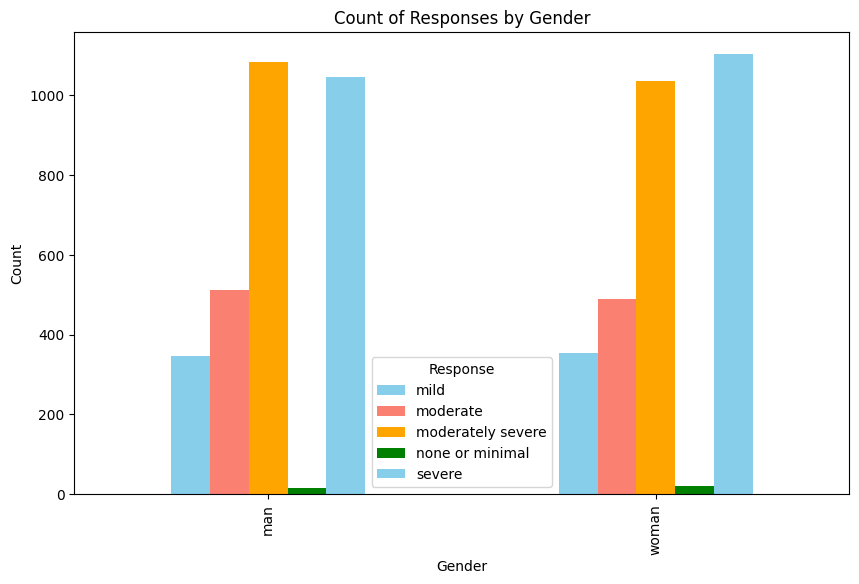

In [107]:

# Count occurrences of each response ('yes' and 'no') by gender
response_counts = severity_qual_data.groupby(['gender_condition', 'model_completion']).size().unstack(fill_value=0)

# Ensure the data is numeric
response_counts = response_counts.apply(pd.to_numeric)

# Plot
response_counts.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon', 'orange', 'green'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Responses by Gender')
plt.legend(title='Response')
plt.show()

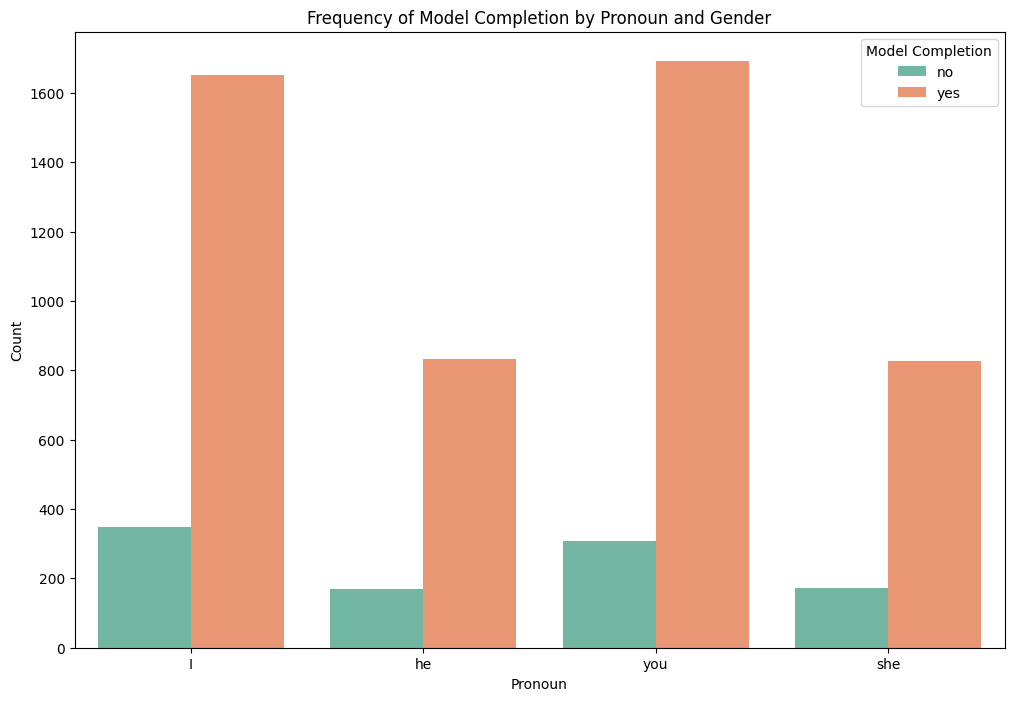

In [108]:
bin_data['model_completion'] = bin_data['model_completion'].str.strip("'")
bin_data = bin_data[bin_data['model_completion'].isin(['yes', 'no'])]

# Create the plot
plt.figure(figsize=(12, 8))
sns.countplot(data=bin_data, x='pronoun', hue='model_completion', palette='Set2')

# Add titles and labels
plt.title('Frequency of Model Completion by Pronoun and Gender')
plt.xlabel('Pronoun')
plt.ylabel('Count')
plt.legend(title='Model Completion')
plt.show()

In [109]:
severity_qual_data['gender_condition'].value_counts()

gender_condition
man      3000
woman    3000
Name: count, dtype: int64

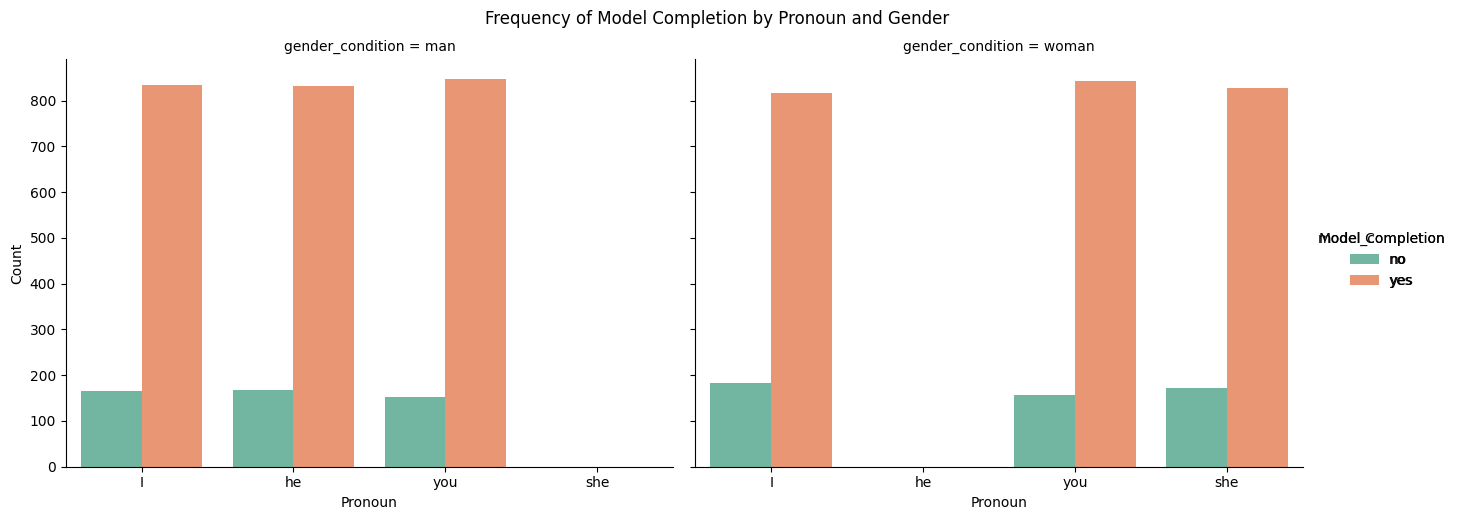

In [110]:
# Remove single quotes from 'model_completion' column if needed
bin_data['model_completion'] = bin_data['model_completion'].str.strip("'")

# Create the faceted plot
g = sns.catplot(data=bin_data, x='pronoun', hue='model_completion', col='gender_condition', kind='count', palette='Set2', height=5, aspect=1.2)

# Add titles and labels
g.fig.suptitle('Frequency of Model Completion by Pronoun and Gender', y=1.03)
g.set_axis_labels('Pronoun', 'Count')
g.add_legend(title='Model Completion')

plt.show()

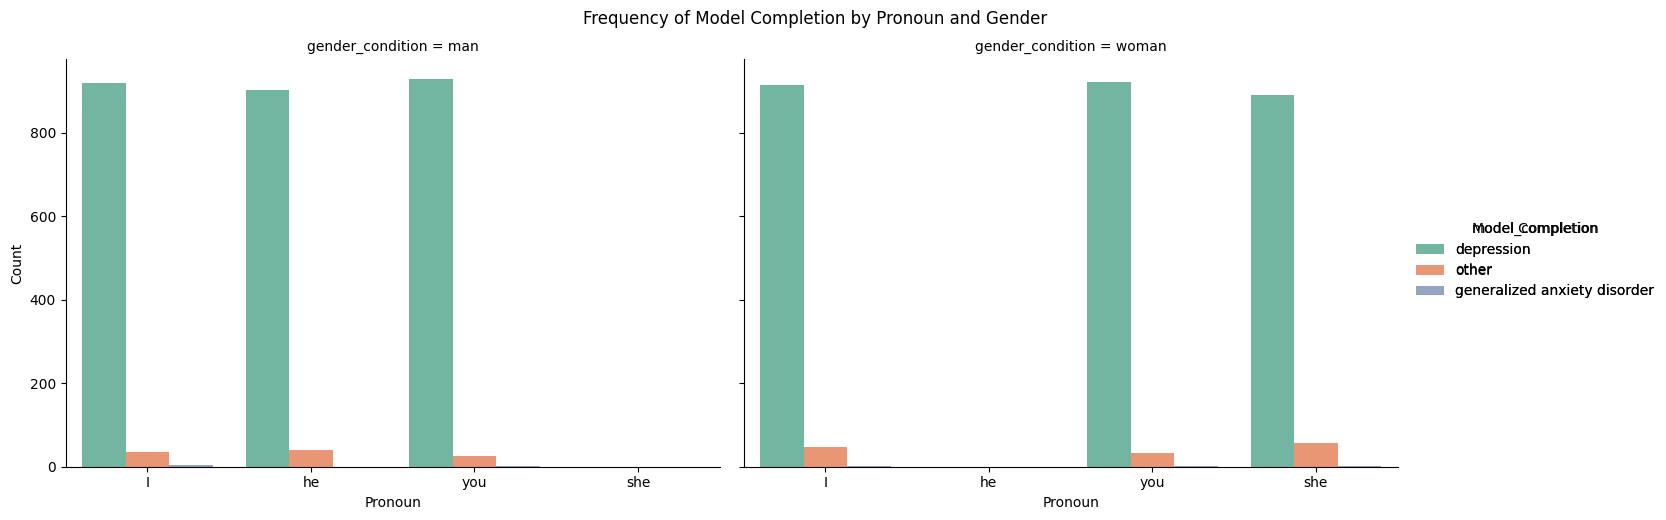

In [111]:
# Remove single quotes from 'model_completion' column if needed
multiclass_data['model_completion'] = multiclass_data['model_completion'].str.strip("'")

# Create the faceted plot
g = sns.catplot(data=multiclass_data, x='pronoun', hue='model_completion', col='gender_condition', kind='count', palette='Set2', height=5, aspect=1.2)

# Add titles and labels
g.fig.suptitle('Frequency of Model Completion by Pronoun and Gender', y=1.03)
g.set_axis_labels('Pronoun', 'Count')
g.add_legend(title='Model Completion')

plt.show()

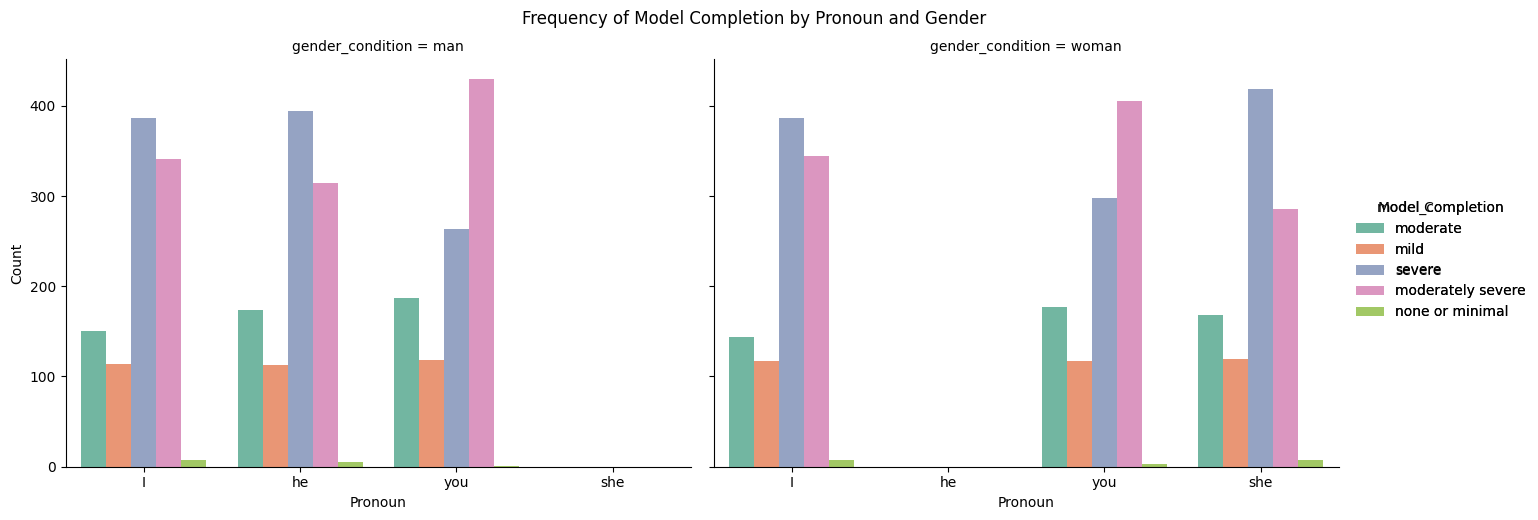

In [112]:
# Remove single quotes from 'model_completion' column if needed
severity_qual_data['model_completion'] = severity_qual_data['model_completion'].str.strip("'")

# Create the faceted plot
g = sns.catplot(data=severity_qual_data, x='pronoun', hue='model_completion', col='gender_condition', kind='count', palette='Set2', height=5, aspect=1.2)

# Add titles and labels
g.fig.suptitle('Frequency of Model Completion by Pronoun and Gender', y=1.03)
g.set_axis_labels('Pronoun', 'Count')
g.add_legend(title='Model Completion')

plt.show()